In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

import prepare

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Prepare

In [5]:
df = prepare.clean_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, Bulbasaur to Magearna
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock      

In [6]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Overall Rating
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,65,65,45,grass,poison,6.9,1,0,below_average
Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,80,80,60,grass,poison,13.0,1,0,below_average
Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,122,120,80,grass,poison,100.0,1,0,above_average
Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,60,50,65,fire,none,8.5,1,0,below_average
Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,80,65,80,fire,none,19.0,1,0,below_average


# Explore

# What should my target variable be?

- I feel as though base_total should be the target variable since most attributes and stats probably correlate well with the overall base total
- Questions to be asked:

> Does size (height and weight) correlate with separate stat attributes (i.e. attack, defense, hp, sp_attack, sp_defense, speed) and in turn affect the base_total?
>
> Which type of pokemon is strongest/weakest?
>
> Can you use an algorithm to build the perfect team for specific scenarios?
>
> What factors influence the experience growth and egg steps?  Are those quantities correlated?
>
> Does base_happiness affect base_total stats?
>
> Can I predict the number of types of pokemon in subsequent generations?

---------------------------------------------------------------

# Goals and Deliverables

- My goal is to create an algorithm that can accruately assess a pokemon's use within your team makeup

- I am to deliver a working model along with an entire notebook outlining how I came to my conclusion and end product

------

# Initial Thoughts and Hypotheses

> My thought process going into this project is that if I can make sense of what affects the overall total base stats and rack and stack the best combinations of strenghts and weaknesses for different scenarios then I will be able to create a model that can predict most situations and suggest the best 6 pokemon team for any gamer.  I also think that by looking at the trend of pokemon released each generation that I can better predict what subsequent releases of pokemon games will look like in terms of best types of pokemon to look out for and plan to use.

In [22]:
att_stats = df[['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m',
                'base_total']]

<AxesSubplot:>

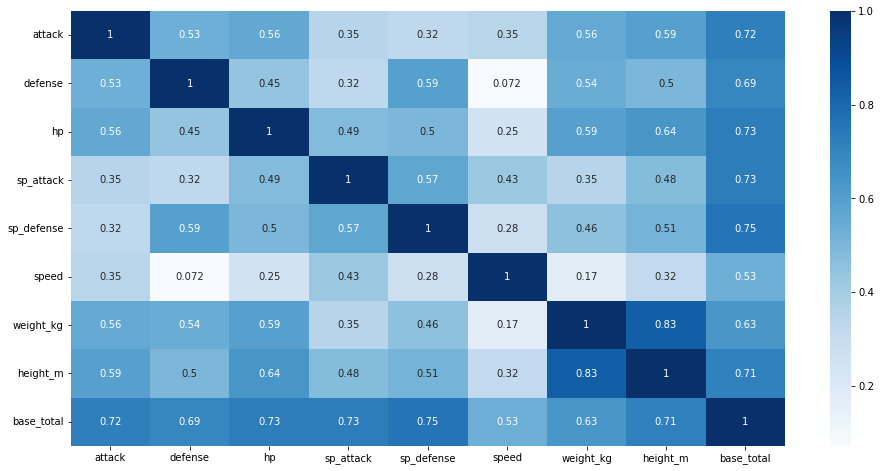

In [23]:
poke_corr = att_stats.corr(method='spearman')

plt.figure(figsize=(16,8))
sns.heatmap(poke_corr, cmap='Blues', annot=True)

## Correlation Takeaways
- Height has a higher correlation with base_total than weight, but height and weight are highly correlated with each other.  Height might be the better indicator of base total than weight while still taking in account the influence of weight. 
- Separate stats (attack, defense, hp, sp_attack, sp_defense) seem to have a significant correlation with base_total, with speed not having a high correlation like the other 5 stats.

In [26]:
# Using hypothesis testing (Spearman Test) to show correlation of each independent variable
# with the target varibale using a more scientific approach
for col in att_stats:
    print(col)
    r, p_value = spearmanr(df[col], df.base_total)

    print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')
    print()

    if p_value < 0.05:
        print('We CAN reject the null hypothesis')
        print()
    else:
        print('We CANNOT reject the null hypothesis')
        print()

attack
Correlation Coefficient by Spearman Test: 0.7183752994251309
p-value: 4.642840720027558e-128

We CAN reject the null hypothesis

defense
Correlation Coefficient by Spearman Test: 0.69497730680621
p-value: 1.4113978227422063e-116

We CAN reject the null hypothesis

hp
Correlation Coefficient by Spearman Test: 0.7274031128714601
p-value: 8.272812245198917e-133

We CAN reject the null hypothesis

sp_attack
Correlation Coefficient by Spearman Test: 0.7252520749217855
p-value: 1.1653407618556783e-131

We CAN reject the null hypothesis

sp_defense
Correlation Coefficient by Spearman Test: 0.7548052341341852
p-value: 1.7842833087898255e-148

We CAN reject the null hypothesis

speed
Correlation Coefficient by Spearman Test: 0.5330662078637494
p-value: 5.265900210749323e-60

We CAN reject the null hypothesis

weight_kg
Correlation Coefficient by Spearman Test: 0.6337085571162685
p-value: 3.629769533707378e-91

We CAN reject the null hypothesis

height_m
Correlation Coefficient by Spearma

In [27]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary', 'Overall Rating'],
      dtype='object')

## Does Weight Affect a Pokemon's Base Total?

<AxesSubplot:xlabel='weight_kg', ylabel='base_total'>

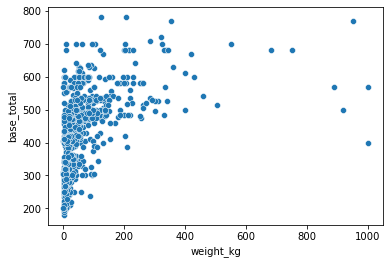

In [7]:
sns.scatterplot(data=df, x=df.weight_kg, y=df.base_total)

<AxesSubplot:xlabel='height_m', ylabel='base_total'>

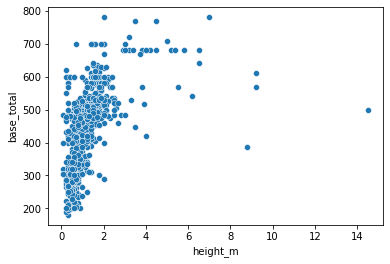

In [24]:
sns.scatterplot(data=df, x=df.height_m, y=df.base_total)

attack


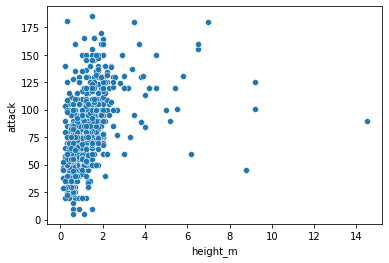

defense


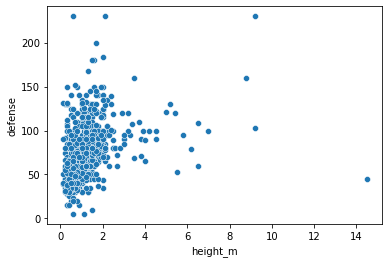

hp


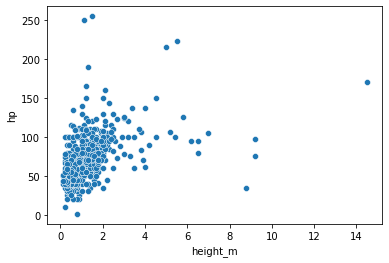

sp_attack


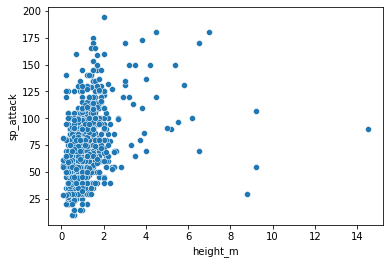

sp_defense


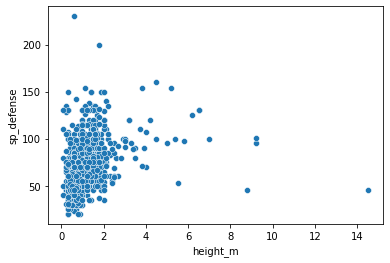

speed


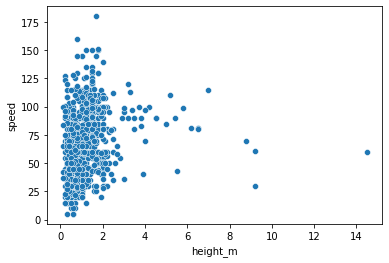

In [38]:
base_stats = df[['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']]
for col in base_stats:
    print(col)
    sns.scatterplot(data=df, y=df[col], x=df.height_m)
    plt.show()

In [21]:
df.base_happiness.value_counts()

70     667
35      69
0       36
100     14
140     10
90       5
Name: base_happiness, dtype: int64

In [54]:
df.base_total.describe()

count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: base_total, dtype: float64

In [60]:
df.generation.value_counts()

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

In [72]:
df[df.base_total == 780]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,,,,,,,,,,,,,,,,,,,,,
Mewtwo,"['Pressure', 'Unnerve']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,-100.0,150,194,120,140,psychic,none,122.0,1,1
Rayquaza,['Air Lock'],0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,...,-100.0,384,180,100,115,dragon,flying,206.5,3,1


attack


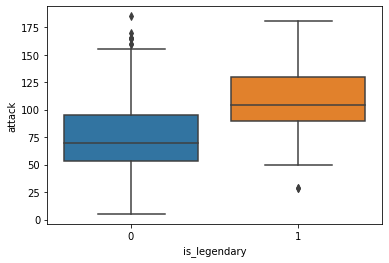

defense


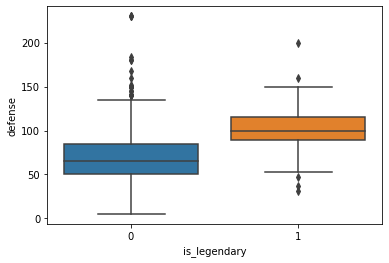

hp


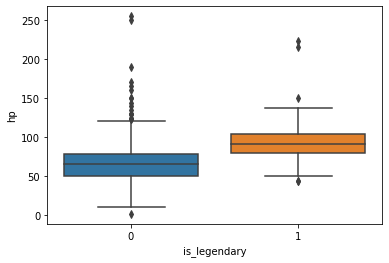

sp_attack


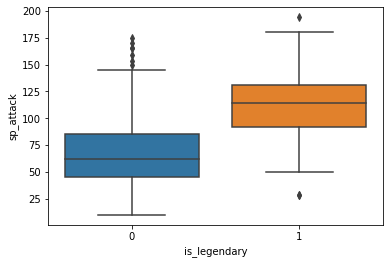

sp_defense


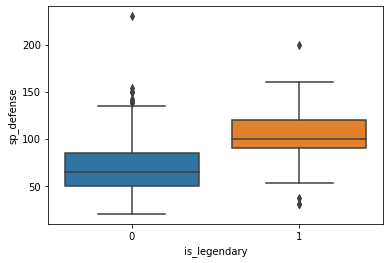

speed


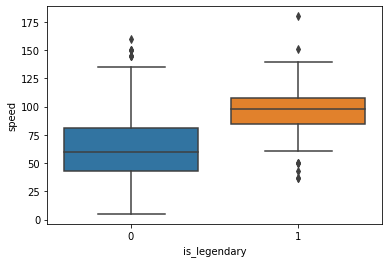

weight_kg


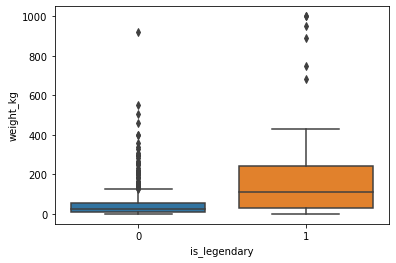

height_m


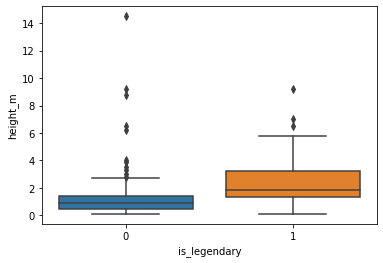

base_total


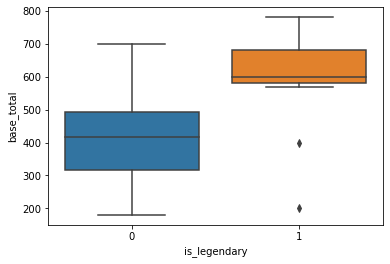

In [43]:
for col in att_stats:
    print(col)
    sns.boxplot(data=df, y=df[col], x=df.is_legendary)
    plt.show()

In [44]:
type_adv = df[['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']]

In [45]:
type_adv

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
name,,,,,,,,,,,,,,,,,,
Bulbasaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Ivysaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Venusaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Charmander,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Charmeleon,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
Kartana,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
Guzzlord,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5


In [46]:
df.against_bug.value_counts()

1.00    376
0.50    247
2.00    128
0.25     42
4.00      8
Name: against_bug, dtype: int64

## Which Type of Pokemon does critical damage to the most amount of pokemon?

In [60]:
for col in type_adv:
    print(col)
    print(df[col][df[col] == 2].count())

against_bug
128
against_dark
105
against_dragon
43
against_electric
181
against_fairy
103
against_fight
184
against_fire
187
against_flying
181
against_ghost
112
against_grass
135
against_ground
184
against_ice
212
against_normal
0
against_poison
102
against_psychic
102
against_rock
198
against_steel
100
against_water
129


## Ice, Rock, Fire, Ground, Fighting,Electric, Flying the top 7 Types to inflict double damage:

> - Ice (212)
> - Rock (198)
> - Fire (187)
> - Ground (184)
> - Fighting (184)
> - Electric (181)
> - Flying (181)

In [63]:
for col in type_adv:
    print(col)
    print(df[col][df[col] == 4].count())

against_bug
8
against_dark
2
against_dragon
0
against_electric
7
against_fairy
9
against_fight
13
against_fire
16
against_flying
12
against_ghost
2
against_grass
28
against_ground
15
against_ice
22
against_normal
0
against_poison
5
against_psychic
2
against_rock
23
against_steel
4
against_water
12


## The Top 6 Types that do Quadruple Damage:

> - Grass (28)
> - Rock (23)
> - Ice (22)
> - Fire (16)
> - Ground (15)
> - Fight (13)


In [64]:
for col in type_adv:
    print(col)
    print(df[col][df[col] == 0].count())

against_bug
0
against_dark
0
against_dragon
47
against_electric
64
against_fairy
0
against_fight
41
against_fire
0
against_flying
0
against_ghost
109
against_grass
0
against_ground
98
against_ice
0
against_normal
41
against_poison
46
against_psychic
46
against_rock
0
against_steel
0
against_water
0


## Top 6 Types that do NO damage to the most amound of pokemon:

> - Ghost (109)
> - Ground (98)
> - Electric (64)
> - Dragon (47)
> - Poison (46)
> - Psychic (46)

## Does a Pokemon's Type have any relationship to base_total?

<AxesSubplot:xlabel='type1', ylabel='base_total'>

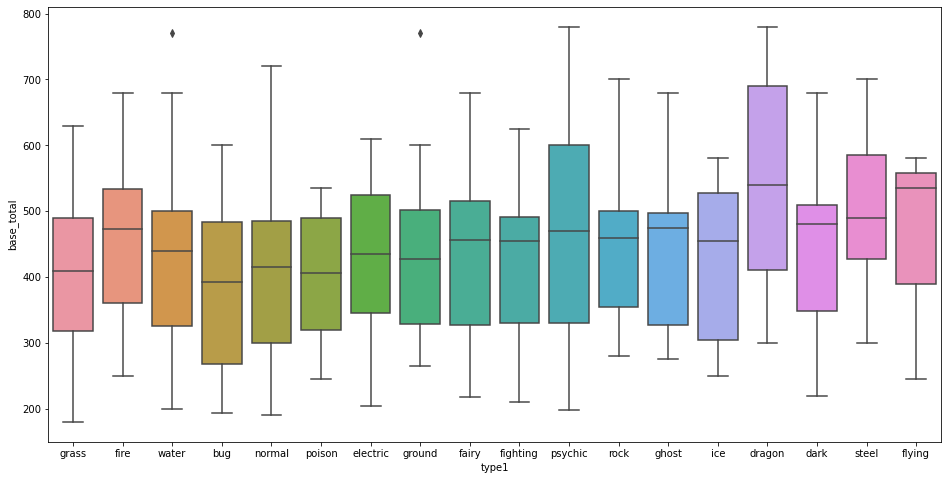

In [66]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df, x = 'type1', y = 'base_total')